# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:49:52.637725: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:49:56.363899
2025-04-14 20:49:56.363899


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:49:49"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

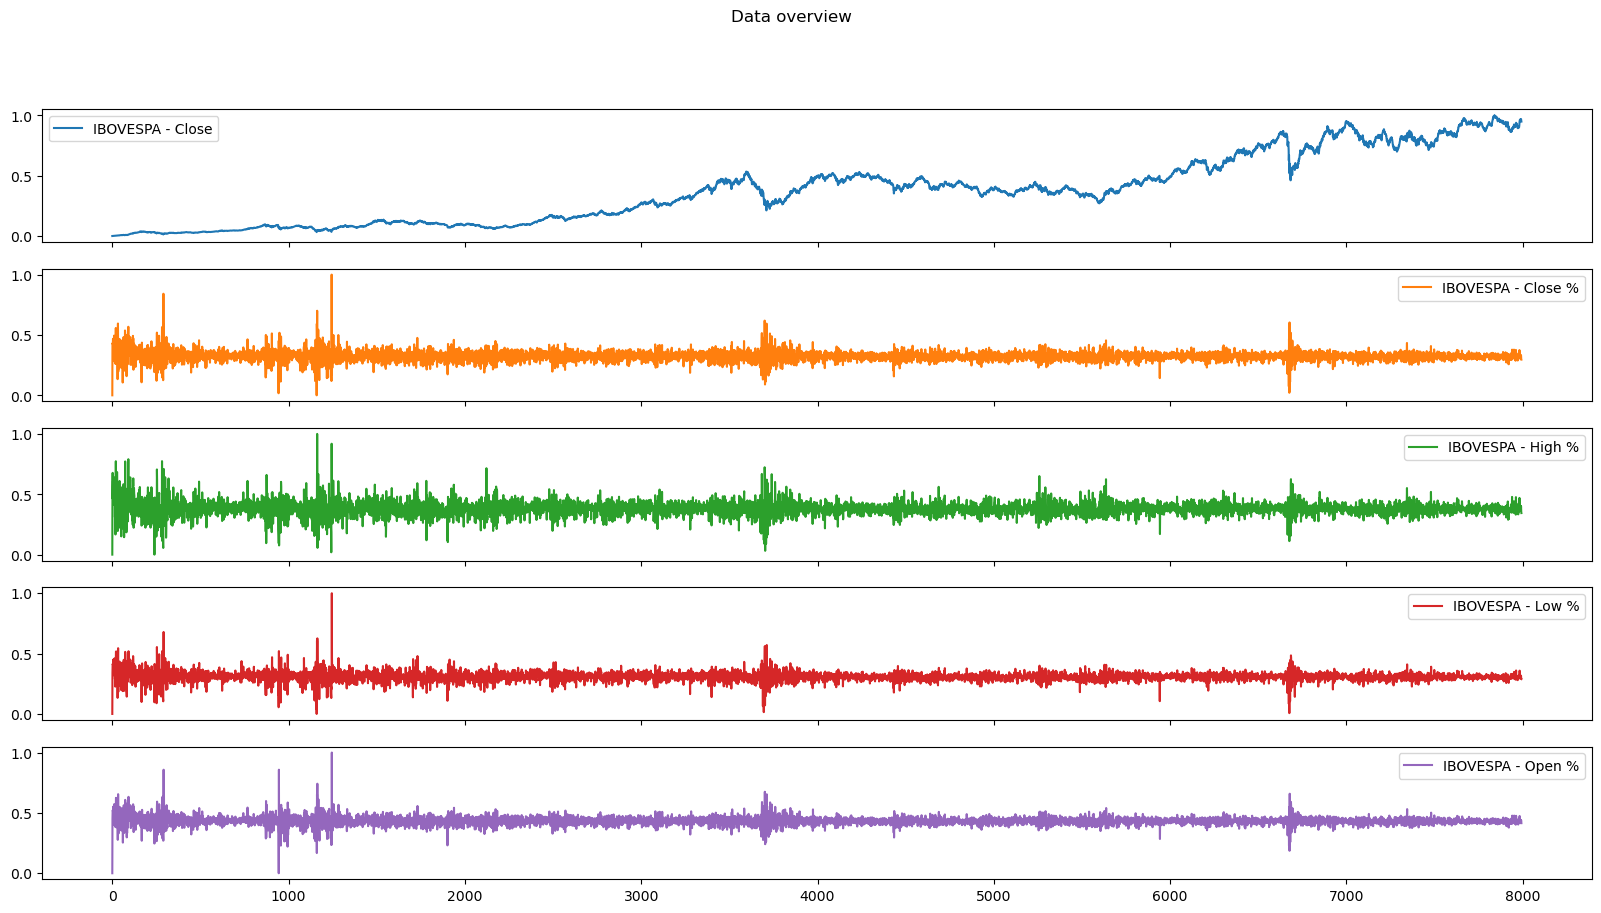

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

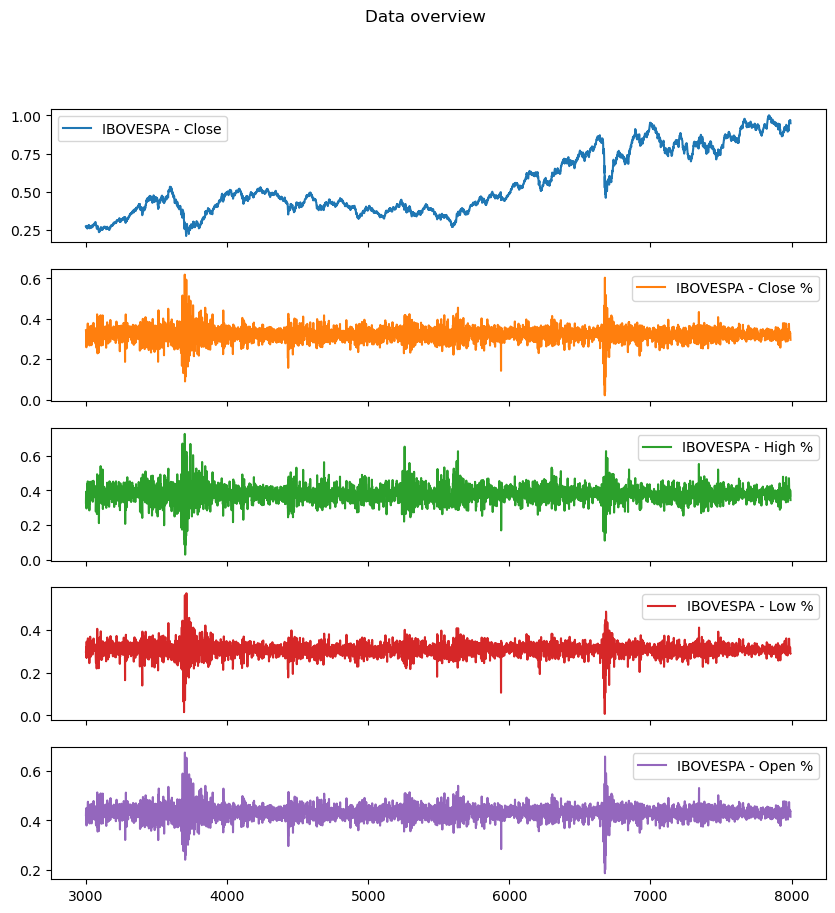

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

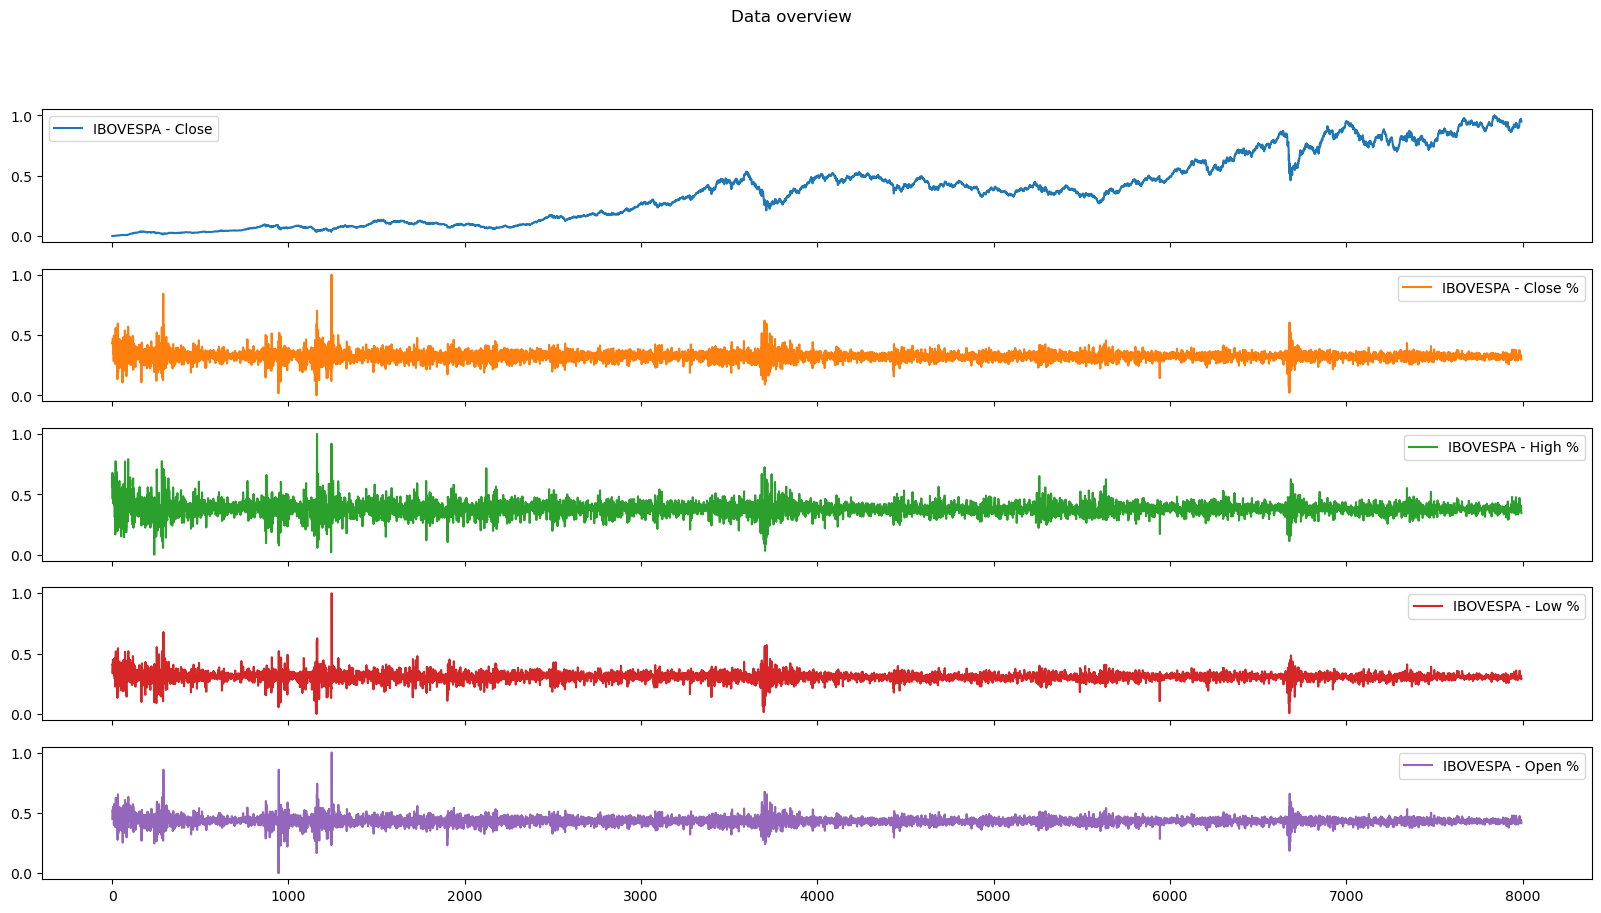

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

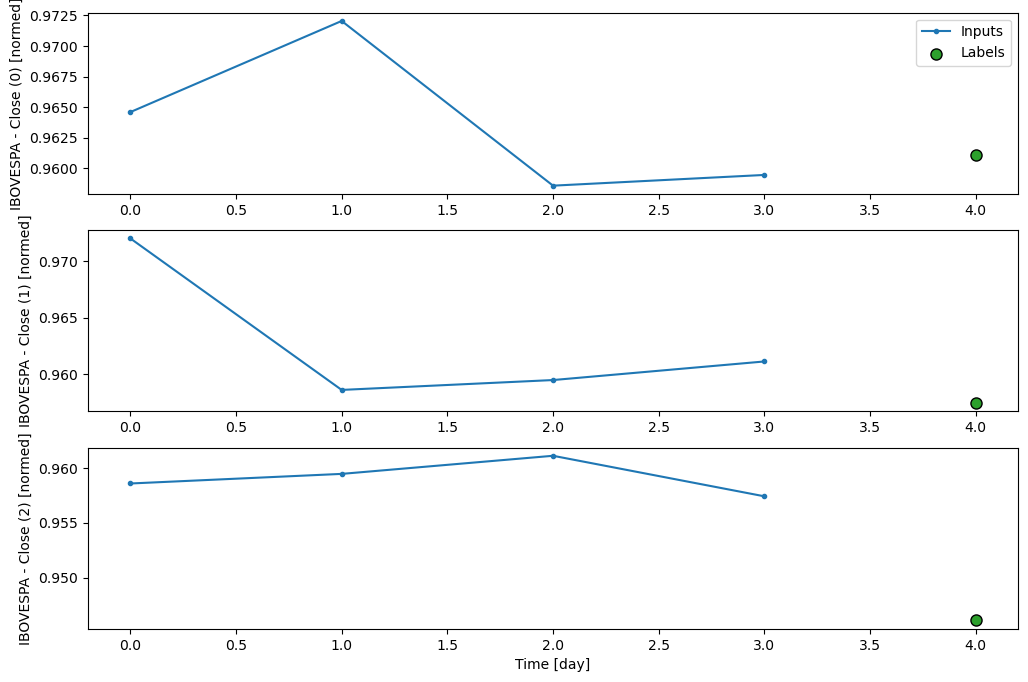

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:35 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 184.5792 - mean_squared_error: 4.2990e-04 - root_mean_squared_error: 0.0196 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 147.7620 - mean_squared_error: 4.1340e-04 - root_mean_squared_error: 0.0197

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 124.4870 - mean_squared_error: 3.6864e-04 - root_mean_squared_error: 0.0187

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 108.0637 - mean_squared_error: 3.2891e-04 - root_mean_squared_error: 0.0177

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 96.4048 - mean_squared_error: 3.0675e-04 - root_mean_squared_error: 0.0171 

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 87.9060 - mean_squared_error: 2.9401e-04 - root_mean_squared_error: 0.0168

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 79.7264 - mean_squared_error: 2.8856e-04 - root_mean_squared_error: 0.0167

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.3080 - mean_squared_error: 2.8606e-04 - root_mean_squared_error: 0.0166

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.6819 - mean_squared_error: 2.8443e-04 - root_mean_squared_error: 0.0166

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.8168 - mean_squared_error: 2.8261e-04 - root_mean_squared_error: 0.0166

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.9700 - mean_squared_error: 2.8722e-04 - root_mean_squared_error: 0.0167

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.4557 - mean_squared_error: 2.9321e-04 - root_mean_squared_error: 0.0169

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 57.1818 - mean_squared_error: 2.9820e-04 - root_mean_squared_error: 0.0171

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 55.1327 - mean_squared_error: 3.0798e-04 - root_mean_squared_error: 0.0173

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 53.0611 - mean_squared_error: 3.4326e-04 - root_mean_squared_error: 0.0181

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 51.6602 - mean_squared_error: 3.8234e-04 - root_mean_squared_error: 0.0189

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 50.5901 - mean_squared_error: 4.2139e-04 - root_mean_squared_error: 0.0196

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 49.2613 - mean_squared_error: 5.4857e-04 - root_mean_squared_error: 0.0214

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 48.2367 - mean_squared_error: 6.8794e-04 - root_mean_squared_error: 0.0231

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 47.2871 - mean_squared_error: 8.2522e-04 - root_mean_squared_error: 0.0248

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 46.3923 - mean_squared_error: 9.5189e-04 - root_mean_squared_error: 0.0263

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 45.5391 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277    

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 44.7401 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0290

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 43.9816 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 43.2566 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0313

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 42.5682 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 41.8077 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 40.9977 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 40.3281 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 39.6828 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 38.9878 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0376

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 38.3377 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0388

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 37.7939 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398

238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 37.1226 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0410 - val_loss: 0.1110 - val_mean_absolute_error: 0.1110 - val_mean_absolute_percentage_error: 11.8531 - val_mean_squared_error: 0.0137 - val_root_mean_squared_error: 0.1169 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 36s 154ms/step - loss: 0.7288 - mean_absolute_error: 0.7288 - mean_absolute_percentage_error: 31444.1602 - mean_squared_error: 0.5313 - root_mean_squared_error: 0.7289

  5/238 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.7266 - mean_absolute_error: 0.7266 - mean_absolute_percentage_error: 18628.9961 - mean_squared_error: 0.5281 - root_mean_squared_error: 0.7267  

  6/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7236 - mean_absolute_error: 0.7236 - mean_absolute_percentage_error: 17105.5293 - mean_squared_error: 0.5238 - root_mean_squared_error: 0.7237

  9/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7118 - mean_absolute_error: 0.7118 - mean_absolute_percentage_error: 13980.9297 - mean_squared_error: 0.5077 - root_mean_squared_error: 0.7123

 11/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7023 - mean_absolute_error: 0.7023 - mean_absolute_percentage_error: 12615.2324 - mean_squared_error: 0.4953 - root_mean_squared_error: 0.7033

 15/238 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6799 - mean_absolute_error: 0.6799 - mean_absolute_percentage_error: 10701.6504 - mean_squared_error: 0.4678 - root_mean_squared_error: 0.6827

 19/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.6519 - mean_absolute_error: 0.6519 - mean_absolute_percentage_error: 9378.0693 - mean_squared_error: 0.4382 - root_mean_squared_error: 0.6594 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.6232 - mean_absolute_error: 0.6232 - mean_absolute_percentage_error: 8389.3545 - mean_squared_error: 0.4108 - root_mean_squared_error: 0.6368

 26/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.6019 - mean_absolute_error: 0.6019 - mean_absolute_percentage_error: 7791.4658 - mean_squared_error: 0.3916 - root_mean_squared_error: 0.6203

 30/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5751 - mean_absolute_error: 0.5751 - mean_absolute_percentage_error: 7130.7949 - mean_squared_error: 0.3682 - root_mean_squared_error: 0.5996

 34/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.5498 - mean_absolute_error: 0.5498 - mean_absolute_percentage_error: 6585.6514 - mean_squared_error: 0.3473 - root_mean_squared_error: 0.5804

 35/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5437 - mean_absolute_error: 0.5437 - mean_absolute_percentage_error: 6463.7915 - mean_squared_error: 0.3424 - root_mean_squared_error: 0.5758

 39/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.5204 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 6023.6021 - mean_squared_error: 0.3242 - root_mean_squared_error: 0.5585

 40/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.5149 - mean_absolute_error: 0.5149 - mean_absolute_percentage_error: 5923.9980 - mean_squared_error: 0.3200 - root_mean_squared_error: 0.5543

 42/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.5041 - mean_absolute_error: 0.5041 - mean_absolute_percentage_error: 5735.5410 - mean_squared_error: 0.3119 - root_mean_squared_error: 0.5463

 45/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.4888 - mean_absolute_error: 0.4888 - mean_absolute_percentage_error: 5476.9556 - mean_squared_error: 0.3005 - root_mean_squared_error: 0.5349

 50/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4652 - mean_absolute_error: 0.4652 - mean_absolute_percentage_error: 5099.6914 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.5174

 54/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4480 - mean_absolute_error: 0.4480 - mean_absolute_percentage_error: 4837.4888 - mean_squared_error: 0.2711 - root_mean_squared_error: 0.5045

 55/238 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4440 - mean_absolute_error: 0.4440 - mean_absolute_percentage_error: 4776.6147 - mean_squared_error: 0.2682 - root_mean_squared_error: 0.5015

 59/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4284 - mean_absolute_error: 0.4284 - mean_absolute_percentage_error: 4549.4287 - mean_squared_error: 0.2574 - root_mean_squared_error: 0.4897

 64/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4106 - mean_absolute_error: 0.4106 - mean_absolute_percentage_error: 4297.3701 - mean_squared_error: 0.2451 - root_mean_squared_error: 0.4762

 69/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 4074.7700 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4637

 73/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 3914.4854 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4545

 76/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.3738 - mean_absolute_error: 0.3738 - mean_absolute_percentage_error: 3803.2554 - mean_squared_error: 0.2203 - root_mean_squared_error: 0.4479

 80/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3632 - mean_absolute_error: 0.3632 - mean_absolute_percentage_error: 3665.5027 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4396

 85/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3509 - mean_absolute_error: 0.3509 - mean_absolute_percentage_error: 3508.2693 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4298

 88/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3439 - mean_absolute_error: 0.3439 - mean_absolute_percentage_error: 3420.9590 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4243

 92/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3352 - mean_absolute_error: 0.3352 - mean_absolute_percentage_error: 3311.8220 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4172

 96/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 3210.2051 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4105

100/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 3115.3240 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4042

104/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 3026.4993 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3981

109/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 2923.1108 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3910

114/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 2827.3052 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3842

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 2721.2297 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3766

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 2639.4124 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3707

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 2562.8848 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3651

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 2477.3096 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3587

143/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 2385.1575 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3517

150/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 2300.3108 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3451

158/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 2211.1697 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3380

163/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 2159.2358 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3338

167/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2374 - mean_absolute_error: 0.2374 - mean_absolute_percentage_error: 2119.5972 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3306

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 2063.0698 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3259

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1992.6964 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3200

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1927.4469 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3144

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1881.5410 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3105

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 1837.9990 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3067

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1803.3861 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3037

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1770.1897 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3008

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1732.0970 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2975

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 1689.8806 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2938

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 1655.4623 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.2907

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1946 - mean_absolute_error: 0.1946 - mean_absolute_percentage_error: 1606.6499 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.2863 - val_loss: 0.1283 - val_mean_absolute_error: 0.1283 - val_mean_absolute_percentage_error: 13.7364 - val_mean_squared_error: 0.0177 - val_root_mean_squared_error: 0.1329 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6328 - mean_absolute_error: 0.6328 - mean_absolute_percentage_error: 27297.8789 - mean_squared_error: 0.4004 - root_mean_squared_error: 0.6328

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6230 - mean_absolute_error: 0.6230 - mean_absolute_percentage_error: 12142.2324 - mean_squared_error: 0.3883 - root_mean_squared_error: 0.6231 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6112 - mean_absolute_error: 0.6112 - mean_absolute_percentage_error: 9361.9199 - mean_squared_error: 0.3744 - root_mean_squared_error: 0.6116 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5981 - mean_absolute_error: 0.5981 - mean_absolute_percentage_error: 8035.3687 - mean_squared_error: 0.3598 - root_mean_squared_error: 0.5993

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5798 - mean_absolute_error: 0.5798 - mean_absolute_percentage_error: 7095.3799 - mean_squared_error: 0.3422 - root_mean_squared_error: 0.5836

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5436 - mean_absolute_error: 0.5436 - mean_absolute_percentage_error: 6019.9951 - mean_squared_error: 0.3126 - root_mean_squared_error: 0.5558

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5199 - mean_absolute_error: 0.5199 - mean_absolute_percentage_error: 5515.6895 - mean_squared_error: 0.2953 - root_mean_squared_error: 0.5386

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4839 - mean_absolute_error: 0.4839 - mean_absolute_percentage_error: 4880.4692 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.5130

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4480 - mean_absolute_error: 0.4480 - mean_absolute_percentage_error: 4336.4302 - mean_squared_error: 0.2473 - root_mean_squared_error: 0.4876

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4202 - mean_absolute_error: 0.4202 - mean_absolute_percentage_error: 3955.3196 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4677

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4017 - mean_absolute_error: 0.4017 - mean_absolute_percentage_error: 3715.3250 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4543

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 3505.8555 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4419

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3718 - mean_absolute_error: 0.3718 - mean_absolute_percentage_error: 3350.4734 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4324

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3508 - mean_absolute_error: 0.3508 - mean_absolute_percentage_error: 3106.4365 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4167

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3382 - mean_absolute_error: 0.3382 - mean_absolute_percentage_error: 2964.6331 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.4071

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 2877.8679 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.4011

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 2757.8601 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3926

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 2597.4099 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3809

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 2456.5676 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3703

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 2331.7849 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3606

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 2256.1362 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3546

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 2197.1528 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3498

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 2141.5034 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3452

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 2068.6555 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3391

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 2001.1062 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3334

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1946.9857 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3286

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1904.3048 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3249

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1871.6298 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3220

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1832.4963 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3184

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1773.5295 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3130

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1718.6238 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3079

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1686.1779 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3049

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 1648.9877 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.3013

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 1596.4971 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2963

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 1547.5768 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.2915

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 1501.8584 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2870

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 1487.2871 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2856 - val_loss: 0.0455 - val_mean_absolute_error: 0.0455 - val_mean_absolute_percentage_error: 4.8448 - val_mean_squared_error: 0.0026 - val_root_mean_squared_error: 0.0507 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - mean_absolute_percentage_error: 18329.3164 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.4245

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4116 - mean_absolute_error: 0.4116 - mean_absolute_percentage_error: 8604.9795 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.4119   

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3926 - mean_absolute_error: 0.3926 - mean_absolute_percentage_error: 6677.0234 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3947

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3601 - mean_absolute_error: 0.3601 - mean_absolute_percentage_error: 5376.0361 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3692

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 4441.8423 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3435 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 3889.1763 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.3245

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 3534.3872 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.3108

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 3412.2324 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.3057

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 3245.9160 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2986

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 3050.6001 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2898

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 2962.5178 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2857

 52/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 2802.4495 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2780

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 2595.6174 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2676

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 2393.5681 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2568

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 2201.6584 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2460

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 2059.7566 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2376

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 1936.8154 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2301

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 1843.7073 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2242

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 1760.0317 - mean_squared_error: 0.0550 - root_mean_squared_error: 0.2187

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 1684.3773 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2137

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 1615.6045 - mean_squared_error: 0.0509 - root_mean_squared_error: 0.2090

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 1542.8411 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2039

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 1486.0187 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.1998

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 1425.3195 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1954

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 1377.4943 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.1919

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1314 - mean_absolute_error: 0.1314 - mean_absolute_percentage_error: 1325.9977 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1880

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 1265.7175 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1833 

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 1211.1880 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1790

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 1172.2275 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1758

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1130.9517 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1724

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 1088.1846 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1689

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1048.8354 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1655

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1012.4982 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1624

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 978.8270 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1594 

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 944.1882 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1563

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 915.2368 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1537

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 894.0393 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1518 - val_loss: 0.0143 - val_mean_absolute_error: 0.0143 - val_mean_absolute_percentage_error: 1.5829 - val_mean_squared_error: 3.1296e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 7125.0762 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1644

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 2975.8403 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1339 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 1972.8467 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1134

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 1597.0144 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1028

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 1353.4453 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0948

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 1181.1279 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0885

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 1036.0986 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0828

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 925.9268 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0781 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 839.0306 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0742

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 768.5229 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0708

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 710.0330 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0679

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 666.3906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 618.3028 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 577.3127 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0607

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 541.9109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0587

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 514.2395 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 486.6138 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 459.5146 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0537

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 435.5437 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 416.2047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0509

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 398.6656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0497

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 382.6802 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 368.0442 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0476

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 354.5872 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0466

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 342.1684 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0457

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 330.6690 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0449

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 319.9883 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0441

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 310.0388 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0434

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 301.7496 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0428 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7146 - val_mean_squared_error: 6.4762e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 4684.0762 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1095

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 1783.5092 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0810 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 1204.4623 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0682

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 934.2214 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0605 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 771.9006 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0551

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 652.5000 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 575.4814 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 510.5534 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 464.5979 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 423.2153 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 392.3941 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 363.5087 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 341.2625 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 321.8503 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 304.7573 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 287.9836 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 274.5405 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 262.4149 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 251.4161 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 243.5413 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 238.2430 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 232.2130 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 225.5919 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 219.3770 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 213.5295 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 208.0166 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 203.5351 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 197.1977 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 190.6480 - mean_squared_error: 9.8879e-04 - root_mean_squared_error: 0.0281 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6712 - val_mean_squared_error: 6.1881e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 3918.7329 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 1849.9390 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 1236.6508 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0620

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 957.3363 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0550 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 790.8658 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 678.5815 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 607.3152 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 534.7978 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 479.3162 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 435.3251 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 416.5465 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 395.4795 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 362.9809 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 341.5330 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 317.7778 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 297.4302 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 279.7795 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 264.3194 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 252.0957 - mean_squared_error: 9.6999e-04 - root_mean_squared_error: 0.0278

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 239.7608 - mean_squared_error: 9.3222e-04 - root_mean_squared_error: 0.0273

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 228.6924 - mean_squared_error: 8.9807e-04 - root_mean_squared_error: 0.0268

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 219.7606 - mean_squared_error: 8.7021e-04 - root_mean_squared_error: 0.0264

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 210.5925 - mean_squared_error: 8.4144e-04 - root_mean_squared_error: 0.0259

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 202.2339 - mean_squared_error: 8.1512e-04 - root_mean_squared_error: 0.0255

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 195.3979 - mean_squared_error: 7.9355e-04 - root_mean_squared_error: 0.0252

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 189.0560 - mean_squared_error: 7.7384e-04 - root_mean_squared_error: 0.0249

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 183.1562 - mean_squared_error: 7.5617e-04 - root_mean_squared_error: 0.0246

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 176.9873 - mean_squared_error: 7.3798e-04 - root_mean_squared_error: 0.0243

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 171.8777 - mean_squared_error: 7.2347e-04 - root_mean_squared_error: 0.0241

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 167.6666 - mean_squared_error: 7.1160e-04 - root_mean_squared_error: 0.0239

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 163.6777 - mean_squared_error: 7.0048e-04 - root_mean_squared_error: 0.0238

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 160.4228 - mean_squared_error: 6.9139e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9528 - val_mean_squared_error: 1.1460e-04 - val_root_mean_squared_error: 0.0107 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 6609.9263 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1528

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 2669.5715 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1295 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 1817.5341 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1106

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 1413.3361 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0984

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 1147.4741 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0887

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 1003.3345 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0828

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 882.7573 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0774 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 799.7040 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0734

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 724.8472 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0697

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 670.2720 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 629.4950 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0646

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 589.1492 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 558.2718 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0605

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 527.0958 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0586

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 496.3228 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 469.2867 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0551

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 445.3214 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 423.9104 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0522

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 408.7631 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 390.9546 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 374.7751 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0489

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 360.0048 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0479

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 346.4621 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 332.6713 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0460

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 321.2528 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0452

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 309.5354 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0443

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 299.7632 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0436

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 289.6690 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0428

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 287.7412 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0427 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6477 - val_mean_squared_error: 5.4261e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 3316.0234 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0768

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 1280.1630 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 841.4119 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0483 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 661.8260 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 551.9243 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 476.5936 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 421.1262 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 378.3701 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 340.9189 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 313.6158 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 288.4597 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 269.3583 - mean_squared_error: 9.5219e-04 - root_mean_squared_error: 0.0284

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 252.8676 - mean_squared_error: 8.9920e-04 - root_mean_squared_error: 0.0275

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 238.4749 - mean_squared_error: 8.5305e-04 - root_mean_squared_error: 0.0267

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 224.4755 - mean_squared_error: 8.0828e-04 - root_mean_squared_error: 0.0259

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 213.3481 - mean_squared_error: 7.7296e-04 - root_mean_squared_error: 0.0253

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 202.3393 - mean_squared_error: 7.3856e-04 - root_mean_squared_error: 0.0247

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 193.4534 - mean_squared_error: 7.1069e-04 - root_mean_squared_error: 0.0242

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 184.5412 - mean_squared_error: 6.8258e-04 - root_mean_squared_error: 0.0236

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 177.2628 - mean_squared_error: 6.5951e-04 - root_mean_squared_error: 0.0232

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 169.8871 - mean_squared_error: 6.3615e-04 - root_mean_squared_error: 0.0228

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 163.1616 - mean_squared_error: 6.1511e-04 - root_mean_squared_error: 0.0224

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 157.5943 - mean_squared_error: 5.9811e-04 - root_mean_squared_error: 0.0220

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 152.4325 - mean_squared_error: 5.8284e-04 - root_mean_squared_error: 0.0217

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 147.6309 - mean_squared_error: 5.6874e-04 - root_mean_squared_error: 0.0215

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 142.6724 - mean_squared_error: 5.5416e-04 - root_mean_squared_error: 0.0212

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 140.7914 - mean_squared_error: 5.4864e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.7004 - val_mean_squared_error: 6.3724e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 3570.0264 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0827

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 1480.8502 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 975.2858 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0539 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 748.5273 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 615.1628 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 526.1642 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 461.8572 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 408.1669 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 370.4438 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 339.7308 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 311.6110 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 290.3701 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 272.1062 - mean_squared_error: 9.7044e-04 - root_mean_squared_error: 0.0280

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 256.2184 - mean_squared_error: 9.1744e-04 - root_mean_squared_error: 0.0271

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 240.8174 - mean_squared_error: 8.6676e-04 - root_mean_squared_error: 0.0263

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 228.6093 - mean_squared_error: 8.2701e-04 - root_mean_squared_error: 0.0256

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 217.6998 - mean_squared_error: 7.9191e-04 - root_mean_squared_error: 0.0250

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 207.8825 - mean_squared_error: 7.6032e-04 - root_mean_squared_error: 0.0245

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 198.0602 - mean_squared_error: 7.2856e-04 - root_mean_squared_error: 0.0239

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 190.0567 - mean_squared_error: 7.0260e-04 - root_mean_squared_error: 0.0234

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 182.7379 - mean_squared_error: 6.7891e-04 - root_mean_squared_error: 0.0230

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 176.0178 - mean_squared_error: 6.5741e-04 - root_mean_squared_error: 0.0226

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 169.8239 - mean_squared_error: 6.3808e-04 - root_mean_squared_error: 0.0223

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 164.0932 - mean_squared_error: 6.2046e-04 - root_mean_squared_error: 0.0220

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 158.7737 - mean_squared_error: 6.0437e-04 - root_mean_squared_error: 0.0217

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 153.8205 - mean_squared_error: 5.8942e-04 - root_mean_squared_error: 0.0214

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 148.7020 - mean_squared_error: 5.7396e-04 - root_mean_squared_error: 0.0212 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6372 - val_mean_squared_error: 5.4002e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 3153.6394 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0731

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 1228.1796 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 808.9901 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 620.1636 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 518.1525 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 447.9791 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 396.1922 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 356.1995 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 327.5093 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 300.8095 - mean_squared_error: 9.6785e-04 - root_mean_squared_error: 0.0286

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 278.5418 - mean_squared_error: 9.0118e-04 - root_mean_squared_error: 0.0274

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 259.6579 - mean_squared_error: 8.4445e-04 - root_mean_squared_error: 0.0264

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 243.4195 - mean_squared_error: 7.9586e-04 - root_mean_squared_error: 0.0256

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 232.2688 - mean_squared_error: 7.6282e-04 - root_mean_squared_error: 0.0250

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 220.8473 - mean_squared_error: 7.2996e-04 - root_mean_squared_error: 0.0244

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 209.4095 - mean_squared_error: 6.9840e-04 - root_mean_squared_error: 0.0238

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 199.2145 - mean_squared_error: 6.7044e-04 - root_mean_squared_error: 0.0233

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 190.0618 - mean_squared_error: 6.4515e-04 - root_mean_squared_error: 0.0229

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 180.9235 - mean_squared_error: 6.1960e-04 - root_mean_squared_error: 0.0224

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 173.4918 - mean_squared_error: 5.9865e-04 - root_mean_squared_error: 0.0220

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 165.9879 - mean_squared_error: 5.7732e-04 - root_mean_squared_error: 0.0216

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 159.8225 - mean_squared_error: 5.5973e-04 - root_mean_squared_error: 0.0213

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 153.5395 - mean_squared_error: 5.4180e-04 - root_mean_squared_error: 0.0209

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 148.3341 - mean_squared_error: 5.2715e-04 - root_mean_squared_error: 0.0206

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 143.5060 - mean_squared_error: 5.1424e-04 - root_mean_squared_error: 0.0204

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 139.0131 - mean_squared_error: 5.0241e-04 - root_mean_squared_error: 0.0201

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 134.3716 - mean_squared_error: 4.9029e-04 - root_mean_squared_error: 0.0199

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 133.4850 - mean_squared_error: 4.8797e-04 - root_mean_squared_error: 0.0199 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7337 - val_mean_squared_error: 7.2963e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 3291.5151 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0762

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 1290.6633 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 843.4362 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0484 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 658.7371 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 546.2684 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 469.8316 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 414.0363 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 371.2637 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 337.3064 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 309.6041 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 286.5159 - mean_squared_error: 9.3199e-04 - root_mean_squared_error: 0.0275

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 266.9442 - mean_squared_error: 8.7167e-04 - root_mean_squared_error: 0.0265

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 248.3943 - mean_squared_error: 8.1438e-04 - root_mean_squared_error: 0.0255

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 233.9795 - mean_squared_error: 7.7021e-04 - root_mean_squared_error: 0.0247

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 219.9968 - mean_squared_error: 7.2829e-04 - root_mean_squared_error: 0.0240

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 208.9051 - mean_squared_error: 6.9549e-04 - root_mean_squared_error: 0.0234

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 197.9481 - mean_squared_error: 6.6338e-04 - root_mean_squared_error: 0.0228

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 189.1165 - mean_squared_error: 6.3738e-04 - root_mean_squared_error: 0.0223

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 180.2701 - mean_squared_error: 6.1120e-04 - root_mean_squared_error: 0.0218

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 173.0542 - mean_squared_error: 5.8978e-04 - root_mean_squared_error: 0.0214

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 166.4487 - mean_squared_error: 5.7013e-04 - root_mean_squared_error: 0.0210

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 160.3764 - mean_squared_error: 5.5205e-04 - root_mean_squared_error: 0.0207

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 154.7738 - mean_squared_error: 5.3550e-04 - root_mean_squared_error: 0.0204

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 149.5878 - mean_squared_error: 5.2070e-04 - root_mean_squared_error: 0.0201

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 144.7725 - mean_squared_error: 5.0757e-04 - root_mean_squared_error: 0.0198

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 140.2871 - mean_squared_error: 4.9549e-04 - root_mean_squared_error: 0.0196

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 136.5503 - mean_squared_error: 4.8546e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6843 - val_mean_squared_error: 6.2647e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 2920.0376 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0677

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 1080.0221 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0507 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 750.5880 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 588.3543 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 489.2587 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 415.4296 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 367.3740 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 330.2598 - mean_squared_error: 9.7424e-04 - root_mean_squared_error: 0.0290

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 300.6329 - mean_squared_error: 8.9349e-04 - root_mean_squared_error: 0.0276

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 276.3700 - mean_squared_error: 8.2651e-04 - root_mean_squared_error: 0.0264

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 256.0956 - mean_squared_error: 7.7004e-04 - root_mean_squared_error: 0.0253

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 238.8697 - mean_squared_error: 7.2175e-04 - root_mean_squared_error: 0.0244

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 224.0320 - mean_squared_error: 6.8007e-04 - root_mean_squared_error: 0.0236

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 211.1064 - mean_squared_error: 6.4407e-04 - root_mean_squared_error: 0.0229

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 198.5599 - mean_squared_error: 6.0973e-04 - root_mean_squared_error: 0.0222

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 188.6020 - mean_squared_error: 5.8280e-04 - root_mean_squared_error: 0.0217

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 178.7616 - mean_squared_error: 5.5654e-04 - root_mean_squared_error: 0.0211

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 170.8278 - mean_squared_error: 5.3533e-04 - root_mean_squared_error: 0.0207

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 162.8783 - mean_squared_error: 5.1396e-04 - root_mean_squared_error: 0.0203

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 156.3920 - mean_squared_error: 4.9646e-04 - root_mean_squared_error: 0.0199

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 149.8243 - mean_squared_error: 4.7875e-04 - root_mean_squared_error: 0.0195

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 144.4143 - mean_squared_error: 4.6429e-04 - root_mean_squared_error: 0.0192

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 138.8892 - mean_squared_error: 4.4990e-04 - root_mean_squared_error: 0.0189

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 134.3019 - mean_squared_error: 4.3841e-04 - root_mean_squared_error: 0.0187

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 130.0372 - mean_squared_error: 4.2786e-04 - root_mean_squared_error: 0.0185

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 126.0610 - mean_squared_error: 4.1807e-04 - root_mean_squared_error: 0.0183

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 123.5568 - mean_squared_error: 4.1193e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6671 - val_mean_squared_error: 5.9013e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 3122.0835 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0724

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 1224.1097 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 826.1591 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0466 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 624.9705 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 518.8350 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 446.6015 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 393.7227 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 353.1204 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 320.8508 - mean_squared_error: 9.8858e-04 - root_mean_squared_error: 0.0287

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 294.5143 - mean_squared_error: 9.1201e-04 - root_mean_squared_error: 0.0274

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 274.8222 - mean_squared_error: 8.5434e-04 - root_mean_squared_error: 0.0264

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 257.8439 - mean_squared_error: 8.0434e-04 - root_mean_squared_error: 0.0255

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 241.3170 - mean_squared_error: 7.5551e-04 - root_mean_squared_error: 0.0246

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 226.9772 - mean_squared_error: 7.1330e-04 - root_mean_squared_error: 0.0239

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 214.4080 - mean_squared_error: 6.7655e-04 - root_mean_squared_error: 0.0232

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 202.1291 - mean_squared_error: 6.4065e-04 - root_mean_squared_error: 0.0225

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 192.3323 - mean_squared_error: 6.1198e-04 - root_mean_squared_error: 0.0219

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 184.4639 - mean_squared_error: 5.8896e-04 - root_mean_squared_error: 0.0214

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 180.7906 - mean_squared_error: 5.7821e-04 - root_mean_squared_error: 0.0212

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 174.7365 - mean_squared_error: 5.6047e-04 - root_mean_squared_error: 0.0209

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 167.5803 - mean_squared_error: 5.3949e-04 - root_mean_squared_error: 0.0204

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 161.0434 - mean_squared_error: 5.2035e-04 - root_mean_squared_error: 0.0200

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 155.6883 - mean_squared_error: 5.0475e-04 - root_mean_squared_error: 0.0197

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 150.7121 - mean_squared_error: 4.9034e-04 - root_mean_squared_error: 0.0194

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 145.5175 - mean_squared_error: 4.7549e-04 - root_mean_squared_error: 0.0191

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 140.7043 - mean_squared_error: 4.6235e-04 - root_mean_squared_error: 0.0188

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 136.2299 - mean_squared_error: 4.5043e-04 - root_mean_squared_error: 0.0186

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 132.0586 - mean_squared_error: 4.3948e-04 - root_mean_squared_error: 0.0184

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 129.8613 - mean_squared_error: 4.3373e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7286 - val_mean_squared_error: 7.1282e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 2492.0249 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0579

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 971.2611 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 644.4247 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 507.8561 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 423.7000 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 365.9963 - mean_squared_error: 9.6448e-04 - root_mean_squared_error: 0.0296

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 319.4818 - mean_squared_error: 8.5793e-04 - root_mean_squared_error: 0.0278

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 287.6072 - mean_squared_error: 7.8238e-04 - root_mean_squared_error: 0.0263

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 259.6233 - mean_squared_error: 7.1440e-04 - root_mean_squared_error: 0.0250

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 237.1143 - mean_squared_error: 6.5863e-04 - root_mean_squared_error: 0.0239

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 220.2678 - mean_squared_error: 6.1627e-04 - root_mean_squared_error: 0.0230

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 205.8845 - mean_squared_error: 5.7973e-04 - root_mean_squared_error: 0.0222

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 193.4452 - mean_squared_error: 5.4804e-04 - root_mean_squared_error: 0.0215

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 182.5743 - mean_squared_error: 5.2068e-04 - root_mean_squared_error: 0.0209

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 172.9844 - mean_squared_error: 4.9686e-04 - root_mean_squared_error: 0.0204

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 163.5620 - mean_squared_error: 4.7366e-04 - root_mean_squared_error: 0.0199

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 156.0073 - mean_squared_error: 4.5527e-04 - root_mean_squared_error: 0.0195

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 148.4712 - mean_squared_error: 4.3680e-04 - root_mean_squared_error: 0.0190

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 142.3468 - mean_squared_error: 4.2171e-04 - root_mean_squared_error: 0.0187

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 136.7586 - mean_squared_error: 4.0791e-04 - root_mean_squared_error: 0.0183

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 131.6367 - mean_squared_error: 3.9524e-04 - root_mean_squared_error: 0.0180

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 126.9230 - mean_squared_error: 3.8360e-04 - root_mean_squared_error: 0.0178

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 123.5080 - mean_squared_error: 3.7529e-04 - root_mean_squared_error: 0.0176

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 119.4062 - mean_squared_error: 3.6565e-04 - root_mean_squared_error: 0.0173

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 115.5962 - mean_squared_error: 3.5711e-04 - root_mean_squared_error: 0.0171

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 112.0464 - mean_squared_error: 3.4933e-04 - root_mean_squared_error: 0.0170

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 108.7307 - mean_squared_error: 3.4213e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7984 - val_mean_squared_error: 8.5264e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 2813.2705 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0653

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 1101.7731 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 745.7670 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 577.7246 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 468.1034 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 402.7509 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 350.4428 - mean_squared_error: 9.5930e-04 - root_mean_squared_error: 0.0287

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 314.7789 - mean_squared_error: 8.6792e-04 - root_mean_squared_error: 0.0271

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 286.3770 - mean_squared_error: 7.9426e-04 - root_mean_squared_error: 0.0257

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 263.1514 - mean_squared_error: 7.3348e-04 - root_mean_squared_error: 0.0246

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 241.7932 - mean_squared_error: 6.7717e-04 - root_mean_squared_error: 0.0235

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 225.6033 - mean_squared_error: 6.3428e-04 - root_mean_squared_error: 0.0226

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 211.6458 - mean_squared_error: 5.9731e-04 - root_mean_squared_error: 0.0219

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 199.4807 - mean_squared_error: 5.6560e-04 - root_mean_squared_error: 0.0212

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 188.7784 - mean_squared_error: 5.3847e-04 - root_mean_squared_error: 0.0207

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 178.2859 - mean_squared_error: 5.1218e-04 - root_mean_squared_error: 0.0201

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 169.8886 - mean_squared_error: 4.9131e-04 - root_mean_squared_error: 0.0197

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 161.5264 - mean_squared_error: 4.7043e-04 - root_mean_squared_error: 0.0192

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 154.7409 - mean_squared_error: 4.5341e-04 - root_mean_squared_error: 0.0189

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 148.5574 - mean_squared_error: 4.3786e-04 - root_mean_squared_error: 0.0185

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 142.8967 - mean_squared_error: 4.2359e-04 - root_mean_squared_error: 0.0182

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 137.6927 - mean_squared_error: 4.1049e-04 - root_mean_squared_error: 0.0179

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 132.8910 - mean_squared_error: 3.9852e-04 - root_mean_squared_error: 0.0176

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 128.4461 - mean_squared_error: 3.8790e-04 - root_mean_squared_error: 0.0174

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 124.3186 - mean_squared_error: 3.7850e-04 - root_mean_squared_error: 0.0172

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 120.0624 - mean_squared_error: 3.6893e-04 - root_mean_squared_error: 0.0170

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 117.2700 - mean_squared_error: 3.6268e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6231 - val_mean_squared_error: 5.1322e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 2559.4224 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0595

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 1225.8634 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 861.4952 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 682.3511 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 530.1982 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 438.8109 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 389.0811 - mean_squared_error: 9.9217e-04 - root_mean_squared_error: 0.0298

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 341.1066 - mean_squared_error: 8.8271e-04 - root_mean_squared_error: 0.0279

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 304.7100 - mean_squared_error: 7.9746e-04 - root_mean_squared_error: 0.0263

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 276.0576 - mean_squared_error: 7.2900e-04 - root_mean_squared_error: 0.0250

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 252.8494 - mean_squared_error: 6.7267e-04 - root_mean_squared_error: 0.0239

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 233.6049 - mean_squared_error: 6.2540e-04 - root_mean_squared_error: 0.0229

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 217.3554 - mean_squared_error: 5.8509e-04 - root_mean_squared_error: 0.0221

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 203.4310 - mean_squared_error: 5.5035e-04 - root_mean_squared_error: 0.0213

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 190.1092 - mean_squared_error: 5.1728e-04 - root_mean_squared_error: 0.0206

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 179.6744 - mean_squared_error: 4.9164e-04 - root_mean_squared_error: 0.0200

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 169.4728 - mean_squared_error: 4.6659e-04 - root_mean_squared_error: 0.0195

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 160.4761 - mean_squared_error: 4.4446e-04 - root_mean_squared_error: 0.0189

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 153.2377 - mean_squared_error: 4.2669e-04 - root_mean_squared_error: 0.0185

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 145.9973 - mean_squared_error: 4.0886e-04 - root_mean_squared_error: 0.0181

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 140.0991 - mean_squared_error: 3.9434e-04 - root_mean_squared_error: 0.0178

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 134.1355 - mean_squared_error: 3.7969e-04 - root_mean_squared_error: 0.0174

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 129.2296 - mean_squared_error: 3.6776e-04 - root_mean_squared_error: 0.0171

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 124.7063 - mean_squared_error: 3.5701e-04 - root_mean_squared_error: 0.0168

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 120.5203 - mean_squared_error: 3.4734e-04 - root_mean_squared_error: 0.0166

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 116.2195 - mean_squared_error: 3.3779e-04 - root_mean_squared_error: 0.0164

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 112.6284 - mean_squared_error: 3.2989e-04 - root_mean_squared_error: 0.0162

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 109.2749 - mean_squared_error: 3.2258e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6216 - val_mean_squared_error: 5.1080e-05 - val_root_mean_squared_error: 0.0071 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 2176.9578 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 847.1282 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 575.6689 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 438.2677 - mean_squared_error: 9.0682e-04 - root_mean_squared_error: 0.0290

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 365.1725 - mean_squared_error: 7.7892e-04 - root_mean_squared_error: 0.0266

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 315.1635 - mean_squared_error: 6.8665e-04 - root_mean_squared_error: 0.0248

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 278.4172 - mean_squared_error: 6.1620e-04 - root_mean_squared_error: 0.0234

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 247.3715 - mean_squared_error: 5.5488e-04 - root_mean_squared_error: 0.0220

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 225.3760 - mean_squared_error: 5.1042e-04 - root_mean_squared_error: 0.0210

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 205.5370 - mean_squared_error: 4.6961e-04 - root_mean_squared_error: 0.0201

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 190.7287 - mean_squared_error: 4.3874e-04 - root_mean_squared_error: 0.0193

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 176.8257 - mean_squared_error: 4.0951e-04 - root_mean_squared_error: 0.0186

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 166.1053 - mean_squared_error: 3.8702e-04 - root_mean_squared_error: 0.0180

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 156.7412 - mean_squared_error: 3.6777e-04 - root_mean_squared_error: 0.0175

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 148.4822 - mean_squared_error: 3.5098e-04 - root_mean_squared_error: 0.0170

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 141.1362 - mean_squared_error: 3.3616e-04 - root_mean_squared_error: 0.0166

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 134.5566 - mean_squared_error: 3.2308e-04 - root_mean_squared_error: 0.0163

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 128.6243 - mean_squared_error: 3.1130e-04 - root_mean_squared_error: 0.0160

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 123.8173 - mean_squared_error: 3.0169e-04 - root_mean_squared_error: 0.0157

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 118.8657 - mean_squared_error: 2.9183e-04 - root_mean_squared_error: 0.0155

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 114.3347 - mean_squared_error: 2.8279e-04 - root_mean_squared_error: 0.0152

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 110.1710 - mean_squared_error: 2.7449e-04 - root_mean_squared_error: 0.0150

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 106.7422 - mean_squared_error: 2.6771e-04 - root_mean_squared_error: 0.0148

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 103.9305 - mean_squared_error: 2.6227e-04 - root_mean_squared_error: 0.0146

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 101.2795 - mean_squared_error: 2.5760e-04 - root_mean_squared_error: 0.0145

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 98.0840 - mean_squared_error: 2.5218e-04 - root_mean_squared_error: 0.0144 

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 95.1043 - mean_squared_error: 2.4725e-04 - root_mean_squared_error: 0.0143

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 93.2274 - mean_squared_error: 2.4418e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7232 - val_mean_squared_error: 7.0332e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 2462.5542 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0572

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 965.6816 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 656.4255 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 498.0093 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 414.1381 - mean_squared_error: 9.9904e-04 - root_mean_squared_error: 0.0300

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 356.9727 - mean_squared_error: 8.7585e-04 - root_mean_squared_error: 0.0279

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 315.0528 - mean_squared_error: 7.8283e-04 - root_mean_squared_error: 0.0262

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 286.0369 - mean_squared_error: 7.1706e-04 - root_mean_squared_error: 0.0249

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 257.2014 - mean_squared_error: 6.5056e-04 - root_mean_squared_error: 0.0235

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 240.5917 - mean_squared_error: 6.1176e-04 - root_mean_squared_error: 0.0227

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 224.3103 - mean_squared_error: 5.7340e-04 - root_mean_squared_error: 0.0219

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 210.3042 - mean_squared_error: 5.4015e-04 - root_mean_squared_error: 0.0212

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 196.6976 - mean_squared_error: 5.0769e-04 - root_mean_squared_error: 0.0205

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 186.1431 - mean_squared_error: 4.8258e-04 - root_mean_squared_error: 0.0199

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 180.1641 - mean_squared_error: 4.6855e-04 - root_mean_squared_error: 0.0196

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 174.5991 - mean_squared_error: 4.5558e-04 - root_mean_squared_error: 0.0193

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 169.4040 - mean_squared_error: 4.4356e-04 - root_mean_squared_error: 0.0190

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 161.7700 - mean_squared_error: 4.2597e-04 - root_mean_squared_error: 0.0186

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 154.0454 - mean_squared_error: 4.0828e-04 - root_mean_squared_error: 0.0181

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 147.0976 - mean_squared_error: 3.9244e-04 - root_mean_squared_error: 0.0178

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 140.8096 - mean_squared_error: 3.7802e-04 - root_mean_squared_error: 0.0174

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 136.3162 - mean_squared_error: 3.6773e-04 - root_mean_squared_error: 0.0172

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 133.2965 - mean_squared_error: 3.6080e-04 - root_mean_squared_error: 0.0170

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 128.7618 - mean_squared_error: 3.5039e-04 - root_mean_squared_error: 0.0167

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 123.5516 - mean_squared_error: 3.3843e-04 - root_mean_squared_error: 0.0164

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 119.2454 - mean_squared_error: 3.2864e-04 - root_mean_squared_error: 0.0162

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 115.6875 - mean_squared_error: 3.2082e-04 - root_mean_squared_error: 0.0160

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 113.1702 - mean_squared_error: 3.1559e-04 - root_mean_squared_error: 0.0159

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 111.1633 - mean_squared_error: 3.1149e-04 - root_mean_squared_error: 0.0158

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 109.6136 - mean_squared_error: 3.0835e-04 - root_mean_squared_error: 0.0157

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 107.7426 - mean_squared_error: 3.0460e-04 - root_mean_squared_error: 0.0156

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 104.8921 - mean_squared_error: 2.9891e-04 - root_mean_squared_error: 0.0155 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7151 - val_mean_squared_error: 6.8825e-05 - val_root_mean_squared_error: 0.0083 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 2380.4075 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0554

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 991.1779 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 735.0777 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 595.3559 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 492.9359 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 423.6887 - mean_squared_error: 9.8220e-04 - root_mean_squared_error: 0.0298

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 373.3847 - mean_squared_error: 8.7823e-04 - root_mean_squared_error: 0.0280

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 334.9280 - mean_squared_error: 7.9674e-04 - root_mean_squared_error: 0.0265

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 300.5498 - mean_squared_error: 7.2237e-04 - root_mean_squared_error: 0.0251

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 270.2172 - mean_squared_error: 6.5556e-04 - root_mean_squared_error: 0.0237

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 246.0370 - mean_squared_error: 6.0149e-04 - root_mean_squared_error: 0.0226

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 226.2418 - mean_squared_error: 5.5671e-04 - root_mean_squared_error: 0.0216

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 211.4026 - mean_squared_error: 5.2290e-04 - root_mean_squared_error: 0.0209

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 201.6204 - mean_squared_error: 5.0051e-04 - root_mean_squared_error: 0.0204

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 194.2066 - mean_squared_error: 4.8351e-04 - root_mean_squared_error: 0.0200

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 186.0727 - mean_squared_error: 4.6485e-04 - root_mean_squared_error: 0.0195

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 179.8516 - mean_squared_error: 4.5065e-04 - root_mean_squared_error: 0.0192

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 172.9735 - mean_squared_error: 4.3518e-04 - root_mean_squared_error: 0.0188

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 165.6557 - mean_squared_error: 4.1893e-04 - root_mean_squared_error: 0.0185

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 159.9101 - mean_squared_error: 4.0630e-04 - root_mean_squared_error: 0.0182

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 152.9039 - mean_squared_error: 3.9095e-04 - root_mean_squared_error: 0.0178

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 146.5479 - mean_squared_error: 3.7713e-04 - root_mean_squared_error: 0.0174

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 143.5846 - mean_squared_error: 3.7068e-04 - root_mean_squared_error: 0.0173

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 139.3807 - mean_squared_error: 3.6148e-04 - root_mean_squared_error: 0.0171

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 134.8082 - mean_squared_error: 3.5144e-04 - root_mean_squared_error: 0.0168

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 129.3961 - mean_squared_error: 3.3955e-04 - root_mean_squared_error: 0.0165

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 124.4446 - mean_squared_error: 3.2864e-04 - root_mean_squared_error: 0.0162

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 119.8951 - mean_squared_error: 3.1861e-04 - root_mean_squared_error: 0.0160

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 116.1490 - mean_squared_error: 3.1039e-04 - root_mean_squared_error: 0.0158

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 112.2329 - mean_squared_error: 3.0201e-04 - root_mean_squared_error: 0.0155

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 108.5994 - mean_squared_error: 2.9476e-04 - root_mean_squared_error: 0.0154

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 104.8558 - mean_squared_error: 2.8749e-04 - root_mean_squared_error: 0.0152

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 101.7224 - mean_squared_error: 2.8150e-04 - root_mean_squared_error: 0.0150

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 101.3875 - mean_squared_error: 2.8086e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8099 - val_mean_squared_error: 8.6813e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 2225.2664 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 924.4532 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 636.9039 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 486.8296 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 399.3003 - mean_squared_error: 8.9046e-04 - root_mean_squared_error: 0.0286

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 335.9099 - mean_squared_error: 7.6810e-04 - root_mean_squared_error: 0.0263

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 295.4390 - mean_squared_error: 6.8659e-04 - root_mean_squared_error: 0.0247

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 264.5381 - mean_squared_error: 6.2243e-04 - root_mean_squared_error: 0.0234

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 240.0989 - mean_squared_error: 5.7052e-04 - root_mean_squared_error: 0.0223

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 218.2515 - mean_squared_error: 5.2329e-04 - root_mean_squared_error: 0.0212

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 202.0561 - mean_squared_error: 4.8786e-04 - root_mean_squared_error: 0.0204

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 188.3318 - mean_squared_error: 4.5764e-04 - root_mean_squared_error: 0.0197

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 176.5353 - mean_squared_error: 4.3167e-04 - root_mean_squared_error: 0.0190

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 165.2178 - mean_squared_error: 4.0715e-04 - root_mean_squared_error: 0.0184

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 156.3331 - mean_squared_error: 3.8838e-04 - root_mean_squared_error: 0.0180

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 147.6287 - mean_squared_error: 3.7016e-04 - root_mean_squared_error: 0.0175

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 141.4034 - mean_squared_error: 3.5716e-04 - root_mean_squared_error: 0.0172

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 135.0615 - mean_squared_error: 3.4388e-04 - root_mean_squared_error: 0.0168

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 129.3194 - mean_squared_error: 3.3175e-04 - root_mean_squared_error: 0.0165

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 124.0942 - mean_squared_error: 3.2067e-04 - root_mean_squared_error: 0.0162

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 119.3170 - mean_squared_error: 3.1048e-04 - root_mean_squared_error: 0.0160

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 115.4003 - mean_squared_error: 3.0212e-04 - root_mean_squared_error: 0.0157

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 112.1993 - mean_squared_error: 2.9529e-04 - root_mean_squared_error: 0.0155

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 108.7738 - mean_squared_error: 2.8804e-04 - root_mean_squared_error: 0.0153

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 106.3533 - mean_squared_error: 2.8313e-04 - root_mean_squared_error: 0.0152

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 104.0501 - mean_squared_error: 2.7874e-04 - root_mean_squared_error: 0.0151

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 101.8550 - mean_squared_error: 2.7465e-04 - root_mean_squared_error: 0.0150

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 99.4204 - mean_squared_error: 2.7019e-04 - root_mean_squared_error: 0.0149 

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 97.1112 - mean_squared_error: 2.6598e-04 - root_mean_squared_error: 0.0148

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 96.4738 - mean_squared_error: 2.6482e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7216 - val_mean_squared_error: 7.0121e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 1872.6924 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 1065.3005 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 727.8107 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 547.7319 - mean_squared_error: 8.7964e-04 - root_mean_squared_error: 0.0287

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 447.2182 - mean_squared_error: 7.4213e-04 - root_mean_squared_error: 0.0262

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 390.8078 - mean_squared_error: 6.6166e-04 - root_mean_squared_error: 0.0246

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 356.1098 - mean_squared_error: 6.1095e-04 - root_mean_squared_error: 0.0235

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 315.4811 - mean_squared_error: 5.5029e-04 - root_mean_squared_error: 0.0222

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 279.6444 - mean_squared_error: 4.9544e-04 - root_mean_squared_error: 0.0210

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 251.9215 - mean_squared_error: 4.5193e-04 - root_mean_squared_error: 0.0199

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 238.6801 - mean_squared_error: 4.3080e-04 - root_mean_squared_error: 0.0194

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 226.9172 - mean_squared_error: 4.1183e-04 - root_mean_squared_error: 0.0189

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 206.9246 - mean_squared_error: 3.7925e-04 - root_mean_squared_error: 0.0181

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 188.7053 - mean_squared_error: 3.4917e-04 - root_mean_squared_error: 0.0172

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 173.7578 - mean_squared_error: 3.2425e-04 - root_mean_squared_error: 0.0165 

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 166.5426 - mean_squared_error: 3.1213e-04 - root_mean_squared_error: 0.0162

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 159.9679 - mean_squared_error: 3.0105e-04 - root_mean_squared_error: 0.0159

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 151.6824 - mean_squared_error: 2.8713e-04 - root_mean_squared_error: 0.0155

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 144.3026 - mean_squared_error: 2.7483e-04 - root_mean_squared_error: 0.0151

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 137.6830 - mean_squared_error: 2.6407e-04 - root_mean_squared_error: 0.0148

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 132.5288 - mean_squared_error: 2.5595e-04 - root_mean_squared_error: 0.0145

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 128.5529 - mean_squared_error: 2.4984e-04 - root_mean_squared_error: 0.0144

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 124.8350 - mean_squared_error: 2.4420e-04 - root_mean_squared_error: 0.0142

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 121.3491 - mean_squared_error: 2.3894e-04 - root_mean_squared_error: 0.0141

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 116.2022 - mean_squared_error: 2.3125e-04 - root_mean_squared_error: 0.0138

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 110.9632 - mean_squared_error: 2.2346e-04 - root_mean_squared_error: 0.0136

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 106.7274 - mean_squared_error: 2.1707e-04 - root_mean_squared_error: 0.0134

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 102.3724 - mean_squared_error: 2.1049e-04 - root_mean_squared_error: 0.0132

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 98.8200 - mean_squared_error: 2.0509e-04 - root_mean_squared_error: 0.0130 

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 96.7357 - mean_squared_error: 2.0191e-04 - root_mean_squared_error: 0.0129

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 94.3600 - mean_squared_error: 1.9828e-04 - root_mean_squared_error: 0.0128

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 91.7469 - mean_squared_error: 1.9430e-04 - root_mean_squared_error: 0.0127

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 88.9509 - mean_squared_error: 1.9015e-04 - root_mean_squared_error: 0.0126

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 86.0242 - mean_squared_error: 1.8624e-04 - root_mean_squared_error: 0.0125

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 83.5972 - mean_squared_error: 1.8332e-04 - root_mean_squared_error: 0.0124

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 82.1561 - mean_squared_error: 1.8163e-04 - root_mean_squared_error: 0.0123

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 79.9616 - mean_squared_error: 1.7910e-04 - root_mean_squared_error: 0.0123

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 78.9129 - mean_squared_error: 1.7789e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7886 - val_mean_squared_error: 8.3369e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 2225.3550 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 872.9432 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 592.5732 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 449.1960 - mean_squared_error: 9.4797e-04 - root_mean_squared_error: 0.0294

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 373.3018 - mean_squared_error: 8.0482e-04 - root_mean_squared_error: 0.0269

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 321.5756 - mean_squared_error: 7.0391e-04 - root_mean_squared_error: 0.0249

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 283.6752 - mean_squared_error: 6.2806e-04 - root_mean_squared_error: 0.0234

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 251.7453 - mean_squared_error: 5.6291e-04 - root_mean_squared_error: 0.0219

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 226.9541 - mean_squared_error: 5.1158e-04 - root_mean_squared_error: 0.0208

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 208.8791 - mean_squared_error: 4.7382e-04 - root_mean_squared_error: 0.0199

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 193.7499 - mean_squared_error: 4.4205e-04 - root_mean_squared_error: 0.0191

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 182.2107 - mean_squared_error: 4.1777e-04 - root_mean_squared_error: 0.0185

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 173.2986 - mean_squared_error: 3.9906e-04 - root_mean_squared_error: 0.0181

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 166.3970 - mean_squared_error: 3.8472e-04 - root_mean_squared_error: 0.0177

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 160.0841 - mean_squared_error: 3.7186e-04 - root_mean_squared_error: 0.0174

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 154.2839 - mean_squared_error: 3.6017e-04 - root_mean_squared_error: 0.0171

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 147.2399 - mean_squared_error: 3.4609e-04 - root_mean_squared_error: 0.0167

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 141.6370 - mean_squared_error: 3.3493e-04 - root_mean_squared_error: 0.0165

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 134.4072 - mean_squared_error: 3.2061e-04 - root_mean_squared_error: 0.0161

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 128.5643 - mean_squared_error: 3.0894e-04 - root_mean_squared_error: 0.0158

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 123.8232 - mean_squared_error: 2.9943e-04 - root_mean_squared_error: 0.0155

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 118.9322 - mean_squared_error: 2.8959e-04 - root_mean_squared_error: 0.0153

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 115.9026 - mean_squared_error: 2.8348e-04 - root_mean_squared_error: 0.0151

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 113.0393 - mean_squared_error: 2.7772e-04 - root_mean_squared_error: 0.0149

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 109.0263 - mean_squared_error: 2.6967e-04 - root_mean_squared_error: 0.0147

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 104.9218 - mean_squared_error: 2.6164e-04 - root_mean_squared_error: 0.0145

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 101.5108 - mean_squared_error: 2.5553e-04 - root_mean_squared_error: 0.0143

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 98.6784 - mean_squared_error: 2.5060e-04 - root_mean_squared_error: 0.0142 

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 96.9953 - mean_squared_error: 2.4771e-04 - root_mean_squared_error: 0.0141

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 95.0575 - mean_squared_error: 2.4441e-04 - root_mean_squared_error: 0.0140

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 94.4312 - mean_squared_error: 2.4334e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7353 - val_mean_squared_error: 7.2880e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 1671.3999 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 647.2271 - mean_squared_error: 8.6699e-04 - root_mean_squared_error: 0.0289

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 437.0127 - mean_squared_error: 6.2886e-04 - root_mean_squared_error: 0.0242

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 338.6193 - mean_squared_error: 5.0443e-04 - root_mean_squared_error: 0.0214

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 279.6316 - mean_squared_error: 4.2563e-04 - root_mean_squared_error: 0.0195

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 239.8401 - mean_squared_error: 3.7048e-04 - root_mean_squared_error: 0.0180

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 213.7633 - mean_squared_error: 3.3363e-04 - root_mean_squared_error: 0.0170

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 195.6443 - mean_squared_error: 3.0771e-04 - root_mean_squared_error: 0.0162

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 178.7356 - mean_squared_error: 2.8322e-04 - root_mean_squared_error: 0.0155

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 163.2439 - mean_squared_error: 2.6054e-04 - root_mean_squared_error: 0.0148

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 150.4828 - mean_squared_error: 2.4174e-04 - root_mean_squared_error: 0.0142

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 139.7674 - mean_squared_error: 2.2596e-04 - root_mean_squared_error: 0.0136

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 133.5235 - mean_squared_error: 2.1690e-04 - root_mean_squared_error: 0.0133

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 128.7773 - mean_squared_error: 2.1007e-04 - root_mean_squared_error: 0.0131

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 123.5568 - mean_squared_error: 2.0276e-04 - root_mean_squared_error: 0.0129

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 118.7897 - mean_squared_error: 1.9633e-04 - root_mean_squared_error: 0.0126

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 113.0417 - mean_squared_error: 1.8903e-04 - root_mean_squared_error: 0.0124

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 107.8838 - mean_squared_error: 1.8285e-04 - root_mean_squared_error: 0.0122

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 102.6737 - mean_squared_error: 1.7671e-04 - root_mean_squared_error: 0.0120

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 97.9947 - mean_squared_error: 1.7124e-04 - root_mean_squared_error: 0.0119 

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 94.2155 - mean_squared_error: 1.6674e-04 - root_mean_squared_error: 0.0117

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 92.0137 - mean_squared_error: 1.6410e-04 - root_mean_squared_error: 0.0116

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 89.9238 - mean_squared_error: 1.6159e-04 - root_mean_squared_error: 0.0116

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 87.1693 - mean_squared_error: 1.5826e-04 - root_mean_squared_error: 0.0114

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 83.8923 - mean_squared_error: 1.5431e-04 - root_mean_squared_error: 0.0113

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 80.8783 - mean_squared_error: 1.5075e-04 - root_mean_squared_error: 0.0112

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 78.0964 - mean_squared_error: 1.4770e-04 - root_mean_squared_error: 0.0111

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 75.5199 - mean_squared_error: 1.4524e-04 - root_mean_squared_error: 0.0110

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 72.8701 - mean_squared_error: 1.4295e-04 - root_mean_squared_error: 0.0110

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 70.6556 - mean_squared_error: 1.4112e-04 - root_mean_squared_error: 0.0109

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 69.2609 - mean_squared_error: 1.3999e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6505 - val_mean_squared_error: 5.6609e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 2308.7832 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0536

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 907.5319 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 612.8312 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 474.2453 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 384.0964 - mean_squared_error: 8.4675e-04 - root_mean_squared_error: 0.0274

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 330.4490 - mean_squared_error: 7.3735e-04 - root_mean_squared_error: 0.0253

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 287.5089 - mean_squared_error: 6.4806e-04 - root_mean_squared_error: 0.0235

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 261.1622 - mean_squared_error: 5.9247e-04 - root_mean_squared_error: 0.0223

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 244.6921 - mean_squared_error: 5.5740e-04 - root_mean_squared_error: 0.0216

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 230.3895 - mean_squared_error: 5.2672e-04 - root_mean_squared_error: 0.0209

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 213.9828 - mean_squared_error: 4.9133e-04 - root_mean_squared_error: 0.0201

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 199.9798 - mean_squared_error: 4.6097e-04 - root_mean_squared_error: 0.0194

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 189.2958 - mean_squared_error: 4.3777e-04 - root_mean_squared_error: 0.0188

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 178.5385 - mean_squared_error: 4.1445e-04 - root_mean_squared_error: 0.0182

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 169.0565 - mean_squared_error: 3.9414e-04 - root_mean_squared_error: 0.0177

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 159.6473 - mean_squared_error: 3.7454e-04 - root_mean_squared_error: 0.0173

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 151.3320 - mean_squared_error: 3.5746e-04 - root_mean_squared_error: 0.0168

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 143.9232 - mean_squared_error: 3.4232e-04 - root_mean_squared_error: 0.0165

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 137.2757 - mean_squared_error: 3.2878e-04 - root_mean_squared_error: 0.0161

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 131.2733 - mean_squared_error: 3.1647e-04 - root_mean_squared_error: 0.0158

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 126.4048 - mean_squared_error: 3.0646e-04 - root_mean_squared_error: 0.0155

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 121.9199 - mean_squared_error: 2.9721e-04 - root_mean_squared_error: 0.0153

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 117.7734 - mean_squared_error: 2.8865e-04 - root_mean_squared_error: 0.0151

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 113.9266 - mean_squared_error: 2.8068e-04 - root_mean_squared_error: 0.0148

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 111.2187 - mean_squared_error: 2.7509e-04 - root_mean_squared_error: 0.0147

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 108.6495 - mean_squared_error: 2.6983e-04 - root_mean_squared_error: 0.0145

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 105.0332 - mean_squared_error: 2.6282e-04 - root_mean_squared_error: 0.0144

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 101.6741 - mean_squared_error: 2.5668e-04 - root_mean_squared_error: 0.0142

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.8812 - mean_squared_error: 2.5167e-04 - root_mean_squared_error: 0.0141 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 96.2533 - mean_squared_error: 2.4701e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7237 - val_mean_squared_error: 7.0793e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 1314.6780 - mean_squared_error: 9.4237e-04 - root_mean_squared_error: 0.0307

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 540.0450 - mean_squared_error: 5.6953e-04 - root_mean_squared_error: 0.0235  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 349.3032 - mean_squared_error: 4.3859e-04 - root_mean_squared_error: 0.0205

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 279.8538 - mean_squared_error: 3.7500e-04 - root_mean_squared_error: 0.0189

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 231.4271 - mean_squared_error: 3.2474e-04 - root_mean_squared_error: 0.0175

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 198.9054 - mean_squared_error: 2.8832e-04 - root_mean_squared_error: 0.0164

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 177.5804 - mean_squared_error: 2.6308e-04 - root_mean_squared_error: 0.0155

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 159.0017 - mean_squared_error: 2.4020e-04 - root_mean_squared_error: 0.0148

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 144.3452 - mean_squared_error: 2.2154e-04 - root_mean_squared_error: 0.0141

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 132.4435 - mean_squared_error: 2.0596e-04 - root_mean_squared_error: 0.0136

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 122.5603 - mean_squared_error: 1.9285e-04 - root_mean_squared_error: 0.0131

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 114.2058 - mean_squared_error: 1.8172e-04 - root_mean_squared_error: 0.0127

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 107.7853 - mean_squared_error: 1.7326e-04 - root_mean_squared_error: 0.0123

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 101.4660 - mean_squared_error: 1.6522e-04 - root_mean_squared_error: 0.0120

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 95.9302 - mean_squared_error: 1.5863e-04 - root_mean_squared_error: 0.0118 

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 91.0335 - mean_squared_error: 1.5304e-04 - root_mean_squared_error: 0.0116

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 86.6665 - mean_squared_error: 1.4818e-04 - root_mean_squared_error: 0.0114

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 82.7459 - mean_squared_error: 1.4398e-04 - root_mean_squared_error: 0.0112

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 79.9600 - mean_squared_error: 1.4094e-04 - root_mean_squared_error: 0.0111

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 78.0952 - mean_squared_error: 1.3887e-04 - root_mean_squared_error: 0.0110

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 76.3255 - mean_squared_error: 1.3691e-04 - root_mean_squared_error: 0.0110

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 74.6435 - mean_squared_error: 1.3504e-04 - root_mean_squared_error: 0.0109

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 73.0427 - mean_squared_error: 1.3325e-04 - root_mean_squared_error: 0.0108

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 71.8166 - mean_squared_error: 1.3188e-04 - root_mean_squared_error: 0.0108

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 70.0617 - mean_squared_error: 1.2994e-04 - root_mean_squared_error: 0.0107

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 68.4006 - mean_squared_error: 1.2815e-04 - root_mean_squared_error: 0.0106

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 66.5716 - mean_squared_error: 1.2633e-04 - root_mean_squared_error: 0.0106

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 64.8491 - mean_squared_error: 1.2472e-04 - root_mean_squared_error: 0.0105

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 63.4507 - mean_squared_error: 1.2369e-04 - root_mean_squared_error: 0.0105

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 62.1183 - mean_squared_error: 1.2278e-04 - root_mean_squared_error: 0.0104

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 61.0549 - mean_squared_error: 1.2207e-04 - root_mean_squared_error: 0.0104

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 59.8313 - mean_squared_error: 1.2130e-04 - root_mean_squared_error: 0.0104

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 58.6614 - mean_squared_error: 1.2058e-04 - root_mean_squared_error: 0.0104

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 58.2832 - mean_squared_error: 1.2036e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6432 - val_mean_squared_error: 5.5410e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 2322.8691 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 1041.6476 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447  

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 827.1838 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 649.3808 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 527.7169 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 448.5826 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 392.3223 - mean_squared_error: 9.7476e-04 - root_mean_squared_error: 0.0299

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 355.3818 - mean_squared_error: 8.9572e-04 - root_mean_squared_error: 0.0285

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 321.0576 - mean_squared_error: 8.2002e-04 - root_mean_squared_error: 0.0271

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 286.4790 - mean_squared_error: 7.4159e-04 - root_mean_squared_error: 0.0256

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 259.3061 - mean_squared_error: 6.7836e-04 - root_mean_squared_error: 0.0244

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 237.3253 - mean_squared_error: 6.2619e-04 - root_mean_squared_error: 0.0233

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 220.9961 - mean_squared_error: 5.8690e-04 - root_mean_squared_error: 0.0225

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 206.9885 - mean_squared_error: 5.5286e-04 - root_mean_squared_error: 0.0217

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 194.8255 - mean_squared_error: 5.2315e-04 - root_mean_squared_error: 0.0210

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 184.1532 - mean_squared_error: 4.9705e-04 - root_mean_squared_error: 0.0204

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 173.6024 - mean_squared_error: 4.7157e-04 - root_mean_squared_error: 0.0198

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 164.3173 - mean_squared_error: 4.4941e-04 - root_mean_squared_error: 0.0193

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 157.8239 - mean_squared_error: 4.3396e-04 - root_mean_squared_error: 0.0190

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 150.2676 - mean_squared_error: 4.1601e-04 - root_mean_squared_error: 0.0185

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 143.4724 - mean_squared_error: 3.9983e-04 - root_mean_squared_error: 0.0181

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 137.9787 - mean_squared_error: 3.8666e-04 - root_mean_squared_error: 0.0178

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 133.5403 - mean_squared_error: 3.7598e-04 - root_mean_squared_error: 0.0175

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 129.4075 - mean_squared_error: 3.6601e-04 - root_mean_squared_error: 0.0173

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 125.5488 - mean_squared_error: 3.5667e-04 - root_mean_squared_error: 0.0170

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 121.4389 - mean_squared_error: 3.4669e-04 - root_mean_squared_error: 0.0168

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 118.0792 - mean_squared_error: 3.3853e-04 - root_mean_squared_error: 0.0166

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 114.9191 - mean_squared_error: 3.3091e-04 - root_mean_squared_error: 0.0164

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 112.3561 - mean_squared_error: 3.2492e-04 - root_mean_squared_error: 0.0162

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 109.9173 - mean_squared_error: 3.1946e-04 - root_mean_squared_error: 0.0161

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 107.9727 - mean_squared_error: 3.1516e-04 - root_mean_squared_error: 0.0160

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 105.7375 - mean_squared_error: 3.1028e-04 - root_mean_squared_error: 0.0159

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 103.6025 - mean_squared_error: 3.0566e-04 - root_mean_squared_error: 0.0157

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 101.8955 - mean_squared_error: 3.0198e-04 - root_mean_squared_error: 0.0157 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6233 - val_mean_squared_error: 5.1391e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0051


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:50s:868ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:50:53.577708: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:49:49',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:50s:868ms',
 'TRAINING_EPOCHS': 27,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:50:53.795755: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 1410.6887 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 668.7665 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 473.4108 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 411.7759 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 367.8815 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 346.6693 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0324

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 322.7350 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0323

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 302.6785 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

 43/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 278.1530 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 255.1777 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 236.4042 - mean_squared_error: 9.9987e-04 - root_mean_squared_error: 0.0316

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 216.8252 - mean_squared_error: 9.8575e-04 - root_mean_squared_error: 0.0314 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 201.0846 - mean_squared_error: 9.7407e-04 - root_mean_squared_error: 0.0312

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 186.6385 - mean_squared_error: 9.6130e-04 - root_mean_squared_error: 0.0310

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 173.3625 - mean_squared_error: 9.4618e-04 - root_mean_squared_error: 0.0307

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 163.0675 - mean_squared_error: 9.3106e-04 - root_mean_squared_error: 0.0305

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 154.9298 - mean_squared_error: 9.1646e-04 - root_mean_squared_error: 0.0302

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 146.1732 - mean_squared_error: 8.9884e-04 - root_mean_squared_error: 0.0299

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 140.4842 - mean_squared_error: 8.8585e-04 - root_mean_squared_error: 0.0297

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 135.9068 - mean_squared_error: 8.7450e-04 - root_mean_squared_error: 0.0295

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 131.0785 - mean_squared_error: 8.6179e-04 - root_mean_squared_error: 0.0293

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 127.1671 - mean_squared_error: 8.5093e-04 - root_mean_squared_error: 0.0291

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 126.0988 - mean_squared_error: 8.4789e-04 - root_mean_squared_error: 0.0290

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 125.5725 - mean_squared_error: 8.4638e-04 - root_mean_squared_error: 0.0290

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 124.5352 - mean_squared_error: 8.4339e-04 - root_mean_squared_error: 0.0289

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 123.5176 - mean_squared_error: 8.4041e-04 - root_mean_squared_error: 0.0289

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 122.5190 - mean_squared_error: 8.3747e-04 - root_mean_squared_error: 0.0288

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 121.5392 - mean_squared_error: 8.3455e-04 - root_mean_squared_error: 0.0288

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 120.1032 - mean_squared_error: 8.3023e-04 - root_mean_squared_error: 0.0287

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 118.7062 - mean_squared_error: 8.2598e-04 - root_mean_squared_error: 0.0286

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 115.1606 - mean_squared_error: 8.1500e-04 - root_mean_squared_error: 0.0284

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 114.3121 - mean_squared_error: 8.1231e-04 - root_mean_squared_error: 0.0284

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 113.8933 - mean_squared_error: 8.1097e-04 - root_mean_squared_error: 0.0283

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 111.8512 - mean_squared_error: 8.0436e-04 - root_mean_squared_error: 0.0282

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 108.3791 - mean_squared_error: 7.9270e-04 - root_mean_squared_error: 0.0280

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 105.1439 - mean_squared_error: 7.8133e-04 - root_mean_squared_error: 0.0278 

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 102.4473 - mean_squared_error: 7.7171e-04 - root_mean_squared_error: 0.0276

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 100.2133 - mean_squared_error: 7.6349e-04 - root_mean_squared_error: 0.0274

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 97.4981 - mean_squared_error: 7.5313e-04 - root_mean_squared_error: 0.0272 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 95.2218 - mean_squared_error: 7.4415e-04 - root_mean_squared_error: 0.0271


Loss: 0.01974966563284397 - MAE: 0.01974966563284397 - MSE: 0.00048127921763807535 - MAPE: 29.227386474609375 - RMSE: 0.021938076242804527


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.8267 - mean_squared_error: 7.4585e-05 - root_mean_squared_error: 0.0086

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 0.6690 - mean_squared_error: 5.6328e-05 - root_mean_squared_error: 0.0075 


Loss: 0.005747395101934671 - MAE: 0.005747395101934671 - MSE: 5.139126369613223e-05 - MAPE: 0.623335063457489 - RMSE: 0.007168769836425781


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 0.4322 - mean_squared_error: 3.5928e-05 - root_mean_squared_error: 0.0060

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 0.6784 - mean_squared_error: 7.6859e-05 - root_mean_squared_error: 0.0087


Loss: 0.006888582371175289 - MAE: 0.006888582371175289 - MSE: 8.654150587972254e-05 - MAPE: 0.7513173818588257 - RMSE: 0.009302768856287003


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

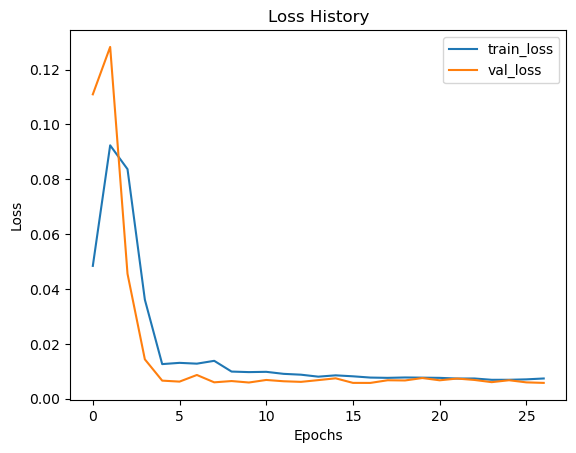

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

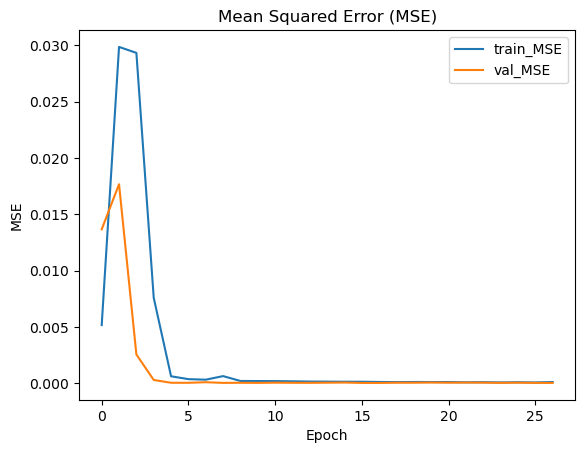

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

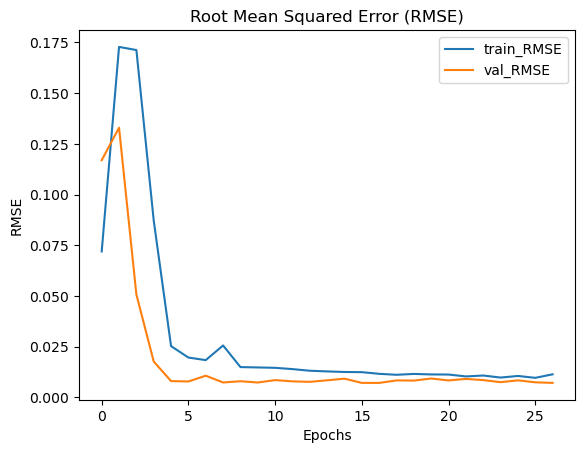

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

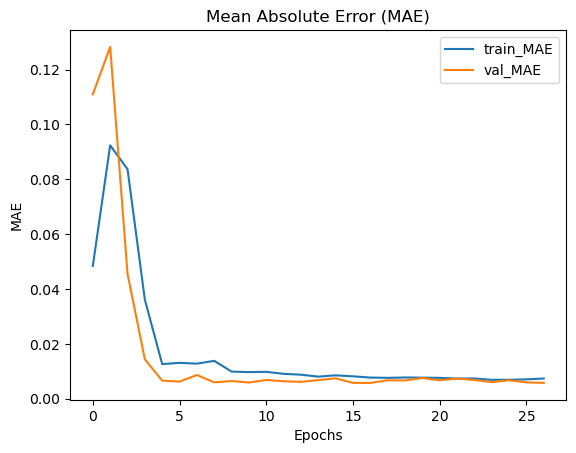

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

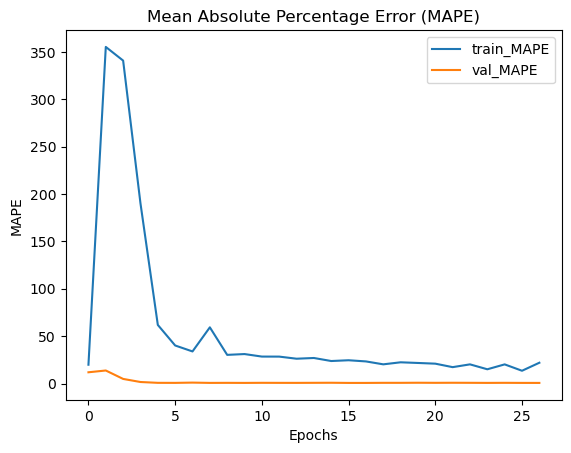

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:50:58.931601: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 5)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


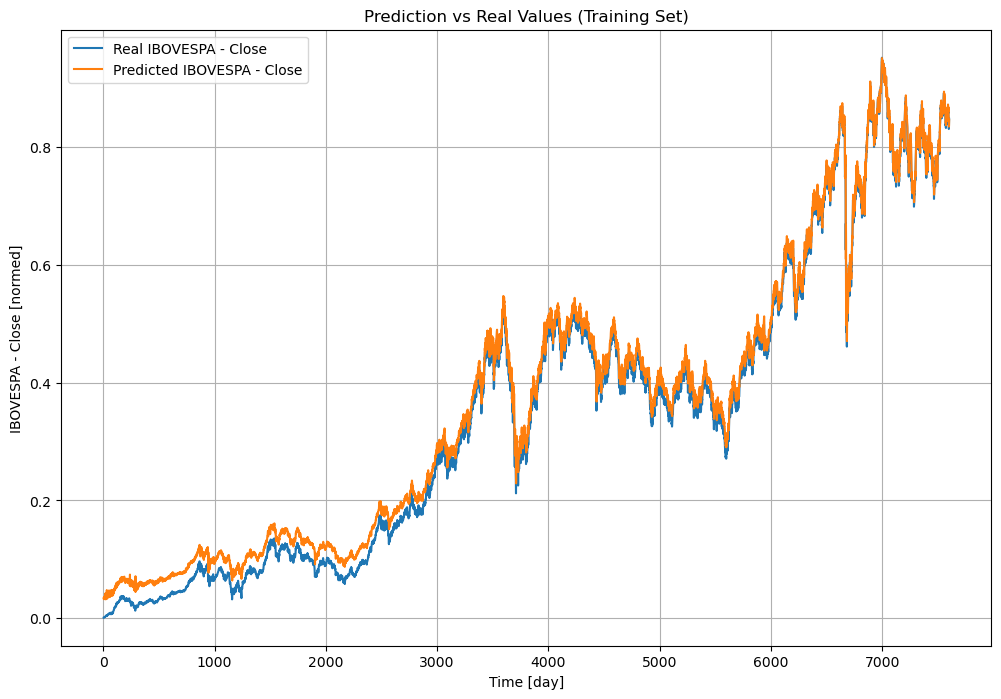

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 5)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


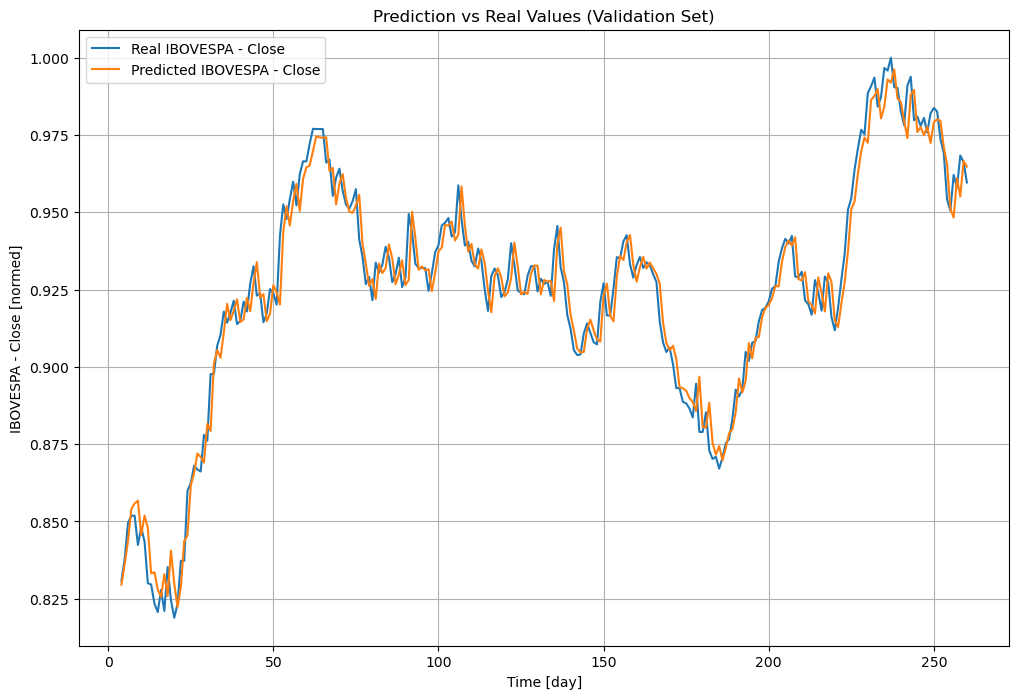

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 5)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


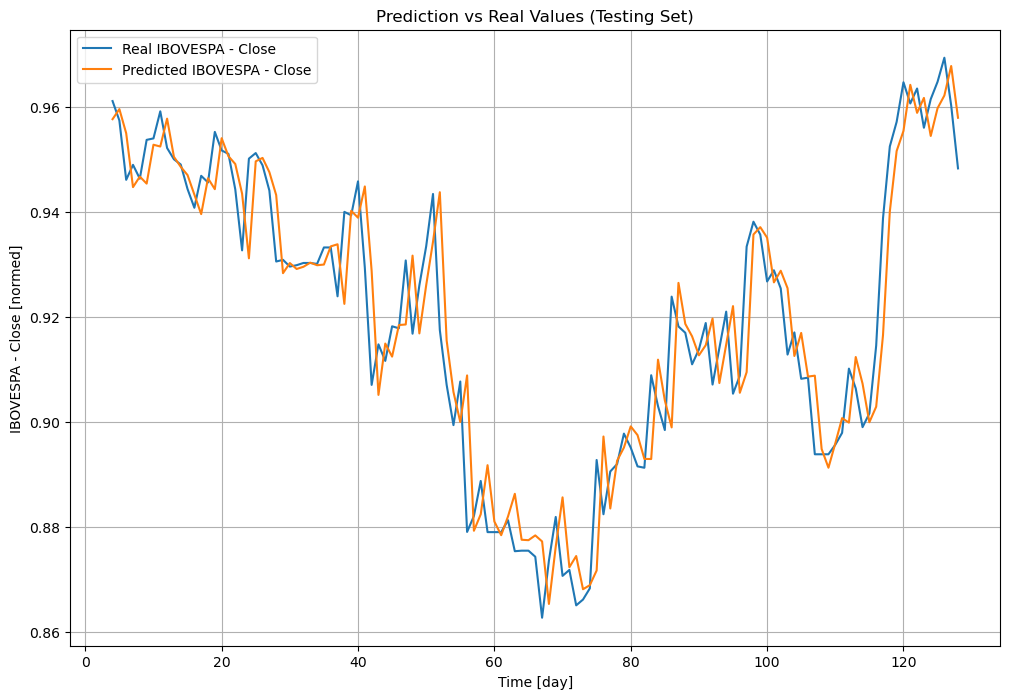

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

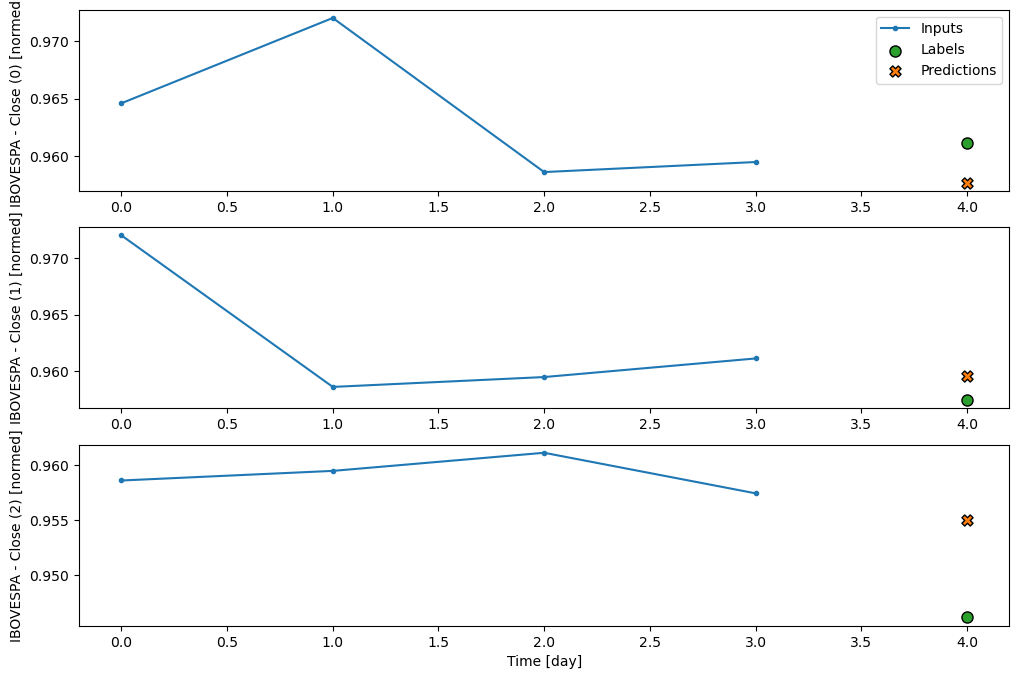

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:5s:581ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[[0.9576623 , 0.9576623 , 0.9576623 , ..., 0.9576623 ,
         0.9576623 , 0.9576623 ]],

       [[0.9595792 , 0.9595792 , 0.9595792 , ..., 0.9595792 ,
         0.9595792 , 0.9595792 ]],

       [[0.95498437, 0.95498437, 0.95498437, ..., 0.95498437,
         0.95498437, 0.95498437]],

       ...,

       [[0.96217567, 0.96217567, 0.96217567, ..., 0.96217567,
         0.96217567, 0.96217567]],

       [[0.9677934 , 0.9677934 , 0.9677934 , ..., 0.9677934 ,
         0.9677934 , 0.9677934 ]],

       [[0.95792675, 0.95792675, 0.95792675, ..., 0.95792675,
         0.95792675, 0.95792675]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')